In [2]:
train_dir=r'C:\Users\Abirami\Desktop\smartinternz\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\fruit-dataset\fruit-dataset\train'
test_dir=r'C:\Users\Abirami\Desktop\smartinternz\Fertilizers_Recommendation_ System_For_Disease_ Prediction\Dataset Plant Disease\fruit-dataset\fruit-dataset\test'

In [3]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

C:\Users\Abirami\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Abirami\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Abirami\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Abirami\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarnin

In [4]:
train_datagen=ImageDataGenerator(rescale=1)
test_datagen=ImageDataGenerator(rescale=1)

x_train=train_datagen.flow_from_directory(train_dir,target_size=(128,128),batch_size=32,class_mode='categorical')  
x_test=test_datagen.flow_from_directory(test_dir,target_size=(128,128),batch_size=32,class_mode='categorical')

Found 5384 images belonging to 6 classes.
Found 1686 images belonging to 6 classes.


# Model

In [8]:
model=keras.Sequential()

model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPool2D((2,2)))

model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D((2,2)))

model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D((2,2)))

model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D((2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(6,activation='softmax'))

In [9]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 12, 12, 128)      

In [14]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
model_history=model.fit_generator(
        x_train,
        steps_per_epoch=100,   ## no. of images(2000)/batch size(20)
        epochs=20,
        )

Epoch 1/20
100/100 [==============================] - 44s 438ms/step - loss: 4.9584 - acc: 0.4802
Epoch 2/20
100/100 [==============================] - 42s 424ms/step - loss: 0.7397 - acc: 0.7312
Epoch 3/20
100/100 [==============================] - 46s 462ms/step - loss: 0.4954 - acc: 0.8133
Epoch 4/20
100/100 [==============================] - 53s 530ms/step - loss: 0.4343 - acc: 0.8454
Epoch 5/20
100/100 [==============================] - 53s 531ms/step - loss: 0.3741 - acc: 0.8625
Epoch 6/20
100/100 [==============================] - 53s 534ms/step - loss: 0.2638 - acc: 0.8963
Epoch 7/20
100/100 [==============================] - 53s 527ms/step - loss: 0.3009 - acc: 0.8974
Epoch 8/20
100/100 [==============================] - 53s 530ms/step - loss: 0.2064 - acc: 0.9285
Epoch 9/20
100/100 [==============================] - 54s 536ms/step - loss: 0.2400 - acc: 0.9188
Epoch 10/20
100/100 [==============================] - 53s 533ms/step - loss: 0.2066 - acc: 0.9241
Epoch 11/20
100/100

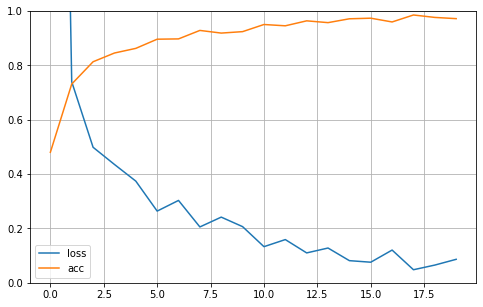

In [17]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [18]:
model.save('fruit.h5')